In [1]:
from src.functions import *

In [ ]:
from bayes_opt import BayesianOptimization
from bayes_opt.logger import JSONLogger
from bayes_opt.event import Events
from bayes_opt import UtilityFunction

In [2]:
n=4
T=0.5
t_max=10
interpolator_kind='cubic'
n_random_models=10
n_iter=10
init_points=1
kappa=2

In [ ]:
file_name = f'n{n}_{interpolator_kind}_BO_TEST'

In [3]:
def loss_ra(x1,x2,x3):
    '''
    Computes the negative average delta for multiple random Ising models 
    using for a given ramp-up schedule and maximum time.
    '''
    ramp_up_schedule = [x1,x2,x3]

    schedule = get_symmetric_schedule(ramp_up_schedule) # mirror and append the ramp up schedule
    schedule_interpolator = get_schedule_interpolator(schedule, kind=interpolator_kind) # get an interpolating function for the continuos schedule
    
    delta_sum = 0    
    for seed in range(n_random_models):
        m = RandomIsingModel(n=n, seed=seed)
        proposal_mat_ra = get_proposal_mat_ra(m, schedule_interpolator, t_max, assert_symmetry=False)
        P = get_transition_matrix(m, T, proposal_mat_ra)
        delta_sum += get_delta(P)
    
    delta_avg = delta_sum / n_random_models
    return delta_avg

In [4]:
pbounds = {'x1': (0,1), 'x2': (0,1), 'x3': (0,1)}

optimizer = BayesianOptimization(
    f=loss_ra,
    pbounds=pbounds,
    random_state=1,
)

In [ ]:
logger = JSONLogger(path = local_path + f'bo_cluster/{file_name}.log')
optimizer.subscribe(Events.OPTIMIZATION_STEP, logger)

In [5]:
optimizer.maximize(
    init_points=init_points,
    n_iter=n_iter,
    acquisition_function=UtilityFunction(kind="ucb", kappa=kappa)
)

|   iter    |  target   |    x1     |    x2     |    x3     |
-------------------------------------------------------------


| 1         | 0.03593   | 0.417     | 0.7203    | 0.0001144 |


| 2         | 0.01717   | 0.3023    | 0.1468    | 0.09234   |


| 3         | 0.008156  | 0.1863    | 0.3456    | 0.3968    |
| 4         | 0.08266   | 0.5388    | 0.4192    | 0.6852    |


| 5         | 0.03091   | 0.2045    | 0.8781    | 0.02739   |
| 6         | 0.08476   | 0.6705    | 0.4173    | 0.5587    |


| 7         | 0.05161   | 0.1404    | 0.1981    | 0.8007    |


| 8         | 0.02877   | 0.9683    | 0.3134    | 0.6923    |


| 9         | 0.01259   | 0.8764    | 0.8946    | 0.08504   |


| 10        | 0.0233    | 0.03905   | 0.1698    | 0.8781    |


| 11        | 0.05611   | 0.09835   | 0.4211    | 0.9579    |
| 12        | 0.06924   | 0.5332    | 0.6919    | 0.3155    |


| 13        | 0.05594   | 0.6865    | 0.8346    | 0.01829   |


| 14        | 0.08684   | 0.7501    | 0.9889    | 0.7482    |


| 15        | 0.03638   | 0.2804    | 0.7893    | 0.1032    |


| 16        | 0.07237   | 0.4479    | 0.9086    | 0.2936    |


| 17        | 0.01394   | 0.2878    | 0.13      | 0.01937   |


| 18        | 0.0863    | 0.6788    | 0.2116    | 0.2655    |


| 19        | 0.06263   | 0.4916    | 0.05336   | 0.5741    |


| 20        | 0.0844    | 0.1467    | 0.5893    | 0.6998    |


| 21        | 0.08979   | 0.4881    | 0.77      | 0.6909    |


| 22        | 0.1089    | 0.2288    | 0.8657    | 0.8273    |


| 23        | 0.02531   | 0.4232    | 1.0       | 0.9898    |


| 24        | 0.1045    | 0.232     | 0.8689    | 0.8305    |


| 25        | 0.05115   | 0.7435    | 0.1665    | 0.6575    |


| 26        | 0.05166   | 0.5091    | 0.6322    | 0.11      |


| 27        | 0.1049    | 0.1961    | 0.7989    | 0.7766    |


| 28        | 0.08824   | 0.4886    | 0.3517    | 0.4821    |


| 29        | 0.09803   | 0.1478    | 0.8795    | 0.7961    |


| 30        | 0.1076    | 0.2424    | 0.8693    | 0.7386    |


| 31        | 0.103     | 0.3178    | 0.7769    | 0.7699    |


| 32        | 0.1154    | 0.2097    | 0.7587    | 0.8841    |


| 33        | 0.07957   | 0.2814    | 0.655     | 0.8572    |


| 34        | 0.01747   | 0.2575    | 0.0351    | 0.3144    |


| 35        | 0.1285    | 0.101     | 0.7786    | 0.9255    |


| 36        | 0.08677   | 0.1172    | 0.7056    | 1.0       |


| 37        | 0.07023   | 0.0292    | 0.7329    | 0.8623    |


| 38        | 0.09581   | 0.1171    | 0.8542    | 0.97      |


| 39        | 0.06573   | 0.9766    | 0.5256    | 0.9334    |


| 40        | 0.03489   | 0.8471    | 0.08636   | 0.2649    |


| 41        | 0.03738   | 0.8659    | 0.4909    | 0.8       |


| 42        | 0.1418    | 0.1462    | 0.8103    | 0.8785    |


| 43        | 0.08535   | 0.3377    | 0.8135    | 0.6034    |


| 44        | 0.06453   | 0.4013    | 0.3083    | 0.9562    |


| 45        | 0.0742    | 0.3881    | 0.6106    | 0.6541    |


| 46        | 0.06995   | 0.6325    | 0.3757    | 0.356     |


| 47        | 0.1483    | 0.1603    | 0.7946    | 0.9235    |


| 48        | 0.06895   | 0.1118    | 0.4943    | 0.06281   |


| 49        | 0.07011   | 0.7252    | 0.1725    | 0.8048    |


| 50        | 0.1151    | 0.1465    | 0.7637    | 0.9029    |


| 51        | 0.133     | 0.2192    | 0.8127    | 0.9528    |


| 52        | 0.1333    | 0.1832    | 0.8339    | 0.9044    |


| 53        | 0.1201    | 0.2681    | 0.7413    | 1.0       |


| 54        | 0.1416    | 0.1848    | 0.7804    | 1.0       |


| 55        | 0.0554    | 0.5888    | 0.9375    | 0.5996    |


| 56        | 0.0931    | 0.5693    | 0.4203    | 0.4983    |


| 57        | 0.07002   | 0.6896    | 0.1967    | 0.1485    |


| 58        | 0.06711   | 0.4805    | 0.6995    | 0.895     |


| 59        | 0.03964   | 0.9437    | 1.0       | 0.8255    |


| 60        | 0.1151    | 0.6057    | 0.6101    | 0.5632    |


| 61        | 0.08102   | 0.7199    | 0.6369    | 0.5039    |


| 62        | 0.09832   | 0.6219    | 0.63      | 0.6836    |


| 63        | 0.07682   | 0.5224    | 0.6923    | 0.5327    |


| 64        | 0.1082    | 0.5413    | 0.5321    | 0.5845    |


| 65        | 0.09191   | 0.2065    | 1.0       | 0.5435    |


| 66        | 0.05935   | 0.01951   | 1.0       | 0.4595    |


| 67        | 0.05231   | 0.6285    | 0.0       | 1.0       |


| 68        | 0.08761   | 0.5799    | 0.5539    | 0.4621    |


| 69        | 0.06948   | 0.8993    | 0.7061    | 0.9004    |


| 70        | 0.1033    | 0.6571    | 0.5402    | 0.6152    |


| 71        | 0.07513   | 0.4231    | 0.2866    | 0.8343    |


| 72        | 0.1468    | 0.1633    | 0.7936    | 0.9618    |


| 73        | 0.04966   | 0.368     | 0.05539   | 0.5326    |


| 74        | 0.0336    | 1.0       | 0.4237    | 0.0       |


| 75        | 0.02974   | 1.0       | 0.0       | 1.0       |


| 76        | 0.05814   | 0.0       | 0.6573    | 0.522     |


| 77        | 0.1145    | 1.0       | 1.0       | 0.4638    |


| 78        | 0.1206    | 1.0       | 0.8623    | 0.4841    |


| 79        | 0.06545   | 0.4909    | 0.8344    | 0.901     |


| 80        | 0.07823   | 0.8872    | 0.9238    | 0.5046    |


| 81        | 0.05828   | 1.0       | 0.8998    | 0.3705    |


| 82        | 0.1559    | 1.0       | 0.9202    | 0.5794    |


| 83        | 0.1436    | 1.0       | 0.8347    | 0.6106    |


| 84        | 0.04733   | 0.8       | 0.636     | 0.5563    |


| 85        | 0.1282    | 1.0       | 0.9151    | 0.6541    |


| 86        | 0.139     | 0.9591    | 0.8785    | 0.5886    |


| 87        | 0.08267   | 0.6999    | 0.6123    | 0.3501    |


| 88        | 0.1179    | 1.0       | 1.0       | 0.5799    |


| 89        | 0.09687   | 1.0       | 0.7552    | 0.5485    |


| 90        | 0.03      | 0.8662    | 0.3108    | 0.9195    |


| 91        | 0.1611    | 1.0       | 0.8753    | 0.5628    |


| 92        | 0.1644    | 1.0       | 0.8836    | 0.5931    |


| 93        | 0.06645   | 0.8376    | 0.8725    | 0.464     |


| 94        | 0.04662   | 1.0       | 0.0       | 0.0       |


| 95        | 0.0272    | 0.3096    | 0.0       | 1.0       |


| 96        | 0.0       | 0.0       | 0.0       | 0.0       |


| 97        | 0.1035    | 0.7334    | 0.8827    | 1.0       |


| 98        | 0.05465   | 0.7002    | 0.7057    | 1.0       |


| 99        | 0.08686   | 0.6951    | 1.0       | 0.937     |


| 100       | 0.1075    | 0.0       | 0.0       | 0.5688    |


| 101       | 0.1442    | 0.0       | 0.1584    | 0.5622    |


| 102       | 0.07456   | 0.0       | 0.1238    | 0.4624    |


| 103       | 0.1262    | 0.0       | 0.2451    | 0.6235    |


| 104       | 0.0556    | 0.8382    | 0.3987    | 0.4458    |


| 105       | 0.02976   | 0.07276   | 0.2532    | 0.4038    |


| 106       | 0.1614    | 0.0       | 0.1207    | 0.6469    |


| 107       | 0.1554    | 0.07722   | 0.1264    | 0.6212    |


| 108       | 0.1132    | 0.06248   | 0.04235   | 0.6784    |


| 109       | 0.1547    | 0.03479   | 0.1667    | 0.6369    |


| 110       | 0.0738    | 0.09685   | 0.5247    | 0.06297   |


| 111       | 0.158     | 0.02278   | 0.1067    | 0.6028    |


| 112       | 0.1359    | 0.1435    | 0.195     | 0.6087    |


| 113       | 0.05023   | 0.2355    | 0.3699    | 0.6708    |


| 114       | 0.1055    | 0.1533    | 0.09932   | 0.5823    |


| 115       | 0.04756   | 1.0       | 0.0       | 0.5611    |


| 116       | 0.06445   | 0.4221    | 0.01654   | 0.4319    |


| 117       | 0.03661   | 0.6096    | 0.0       | 0.0       |


| 118       | 0.06537   | 0.5965    | 0.1067    | 0.5617    |


| 119       | 0.1293    | 0.2261    | 0.817     | 0.9538    |


| 120       | 0.05665   | 0.0       | 0.7241    | 0.2163    |


In [6]:
print(optimizer.max)

{'target': 0.16437888916973287, 'params': {'x1': 1.0, 'x2': 0.8836113593302537, 'x3': 0.5930590937852107}}


In [7]:
x1_opt = optimizer.max['params']['x1']
x2_opt = optimizer.max['params']['x2']
x3_opt = optimizer.max['params']['x3']

Optimized spectral gap =  -0.1644


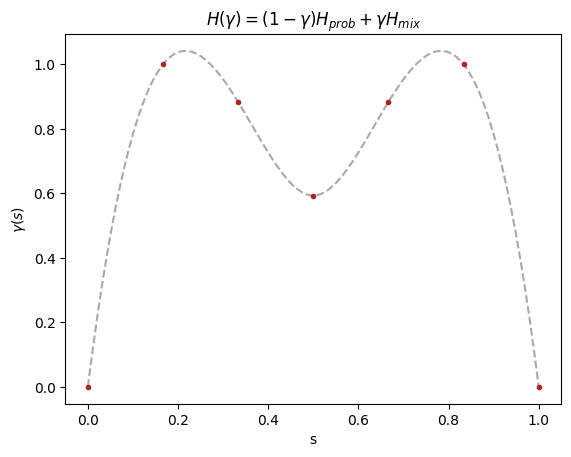

In [8]:
loss_opt = loss_ra(x1_opt, x2_opt, x3_opt)
print('Optimized spectral gap = ', -loss_opt.round(4))

schedule_opt = get_symmetric_schedule([x1_opt, x2_opt, x3_opt])
plot_schedule(schedule_opt, get_schedule_interpolator(schedule_opt, 'cubic')) 

In [9]:
ra_exp = {'n': n,
          'T': T,
          'interpolator_kind': interpolator_kind,
          't_max': t_max,
          'schedule_opt': schedule_opt.tolist(),
          'loss_opt': loss_opt,
          'first_optimizer': 'BO',
          'second_optimizer': 'None',
          'n_random_models': n_random_models,
          'n_iter': n_iter,
          'init_points': init_points,
          'kappa': kappa
          }

save_in_json(ra_exp, f'bo_cluster/{file_name}.json')